#### sklearn.model_selection.KFold
- class sklearn.model_selection.KFold(n_splits=5, *, shuffle=False, random_state=None)

In [12]:
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.datasets import load_iris

iris = load_iris()

In [13]:
features = iris.data
label = iris.target
dt_clf = DecisionTreeClassifier(random_state=156)

In [45]:
from sklearn.model_selection import train_test_split
kfold = KFold(n_splits=3)
cv_accuracy = []
n_iter = 0

for train_index  , test_index in kfold.split(features):
#     print(f"train set :{i}")
#     print(f"validation set :{j}")
#     print('\n')
    n_iter +=1
    X_train , X_test = features[train_index] , features[test_index]
    y_train , y_test = label[train_index] , label[test_index]
    
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    accuracy = np.round(accuracy_score(y_test,pred), 4)
    print(f'\n{n_iter}번째 정확도 {accuracy}  , 학습데이터 크기 {X_train.shape[0]}, 검증데이터 크기 {X_test.shape[0]}')
    print(f'\n {n_iter}번째 검증데이터 인덱스 {test_index} ')
    cv_accuracy.append(accuracy)
    
#     print(accuracy)
# print(cv_accuracy)
# np.mean(cv_accuracy)


1번째 정확도 0.0  , 학습데이터 크기 100, 검증데이터 크기 50

 1번째 검증데이터 인덱스 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49] 

2번째 정확도 0.0  , 학습데이터 크기 100, 검증데이터 크기 50

 2번째 검증데이터 인덱스 [50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73
 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97
 98 99] 

3번째 정확도 0.0  , 학습데이터 크기 100, 검증데이터 크기 50

 3번째 검증데이터 인덱스 [100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149] 


#### sklearn.model_selection.StratifiedKFold
- class sklearn.model_selection.StratifiedKFold(n_splits=5, *, shuffle=False, random_state=None)[source]

In [ ]:
from sklearn.model_selection import StratifiedKFold

sfk = StratifiedKFold(n_splits=3)
cv_accuracy = []
n_iter = 0

for train_index, test_index in sfk.split(features, label):
    n_iter +=1
    X_train, X_test = features[train_index] , features[test_index]
    y_train, y_test =  label[train_index] , label[test_index]
    
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    accuracy = np.round(accuracy_score(y_test,pred), 3)
    print(f'\n{n_iter}번째 정확도 {accuracy}  , 학습데이터 크기 {X_train.shape[0]}, 검증데이터 크기 {X_test.shape[0]}')
    print(f'\n {n_iter}번째 검증데이터 인덱스 {test_index} ')
    cv_accuracy.append(accuracy)
    
#     print(accuracy)
# print(cv_accuracy)
# np.mean(cv_accuracy)

#### sklearn.model_selection.cross_val_score
* sklearn.model_selection.cross_val_score(estimator, X, y=None, *, groups=None, scoring=None, cv=None, n_jobs=None, verbose=0, fit_params=None, pre_dispatch='2*n_jobs', error_score=nan)[source]

In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.datasets import load_iris

iris_data = load_iris()
dt_clf = DecisionTreeClassifier(random_state=156)

features = iris_data.data
label = iris_data.target

scores = cross_val_score(dt_clf,features, label, scoring="accuracy", cv=3)
print(f'교차 검증별 정확도: {np.round(scores, 4)}')
print(f'평균 검증 정확도: {np.round(np.mean(scores), 4)}')


교차 검증별 정확도: [0.98 0.94 0.98]
평균 검증 정확도: 0.9667


#### sklearn.model_selection.GridSearchCV
- class sklearn.model_selection.GridSearchCV(estimator, param_grid, *, scoring=None, n_jobs=None, refit=True, cv=None, verbose=0, pre_dispatch='2*n_jobs', error_score=nan, return_train_score=False)

In [66]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.datasets import GridSearchCV

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target,
                                                   test_size=0.2,random_state=121)
dtree = DecisionTreeClassifier()

parameters =  {'max_depth' : [1,2,3], 'min_samples_split' : [2,3]}


In [67]:
import pandas as pd

grid_dtree = GridSearchCV(dtree, param_grid = parameters, cv=3, refit=True)

# 붓꽃 Train 데이터로 param_grid의 하이퍼 파라미터들을 순차적으로 학습/평가
grid_dtree.fit(X_train, y_train)
# GridSearchCV 결과 추출하여 DataFrame으로 변환
scores_df = pd.DataFrame(grid_dtree.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score',\
    'split0_test_score', 'split1_test_score', 'split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.700000,5,0.700,0.7,0.70
1,"{'max_depth': 1, 'min_samples_split': 3}",0.700000,5,0.700,0.7,0.70
2,"{'max_depth': 2, 'min_samples_split': 2}",0.958333,3,0.925,1.0,0.95
3,"{'max_depth': 2, 'min_samples_split': 3}",0.958333,3,0.925,1.0,0.95
4,"{'max_depth': 3, 'min_samples_split': 2}",0.975000,1,0.975,1.0,0.95
5,"{'max_depth': 3, 'min_samples_split': 3}",0.975000,1,0.975,1.0,0.95


In [69]:
print('GridSearchCV 최적 파라미터 :', grid_dtree.best_params_)
print('GridSearchCV 최고 정확도 : {0:.4f}'.format(grid_dtree.best_score_))

GridSearchCV 최적 파라미터 : {'max_depth': 3, 'min_samples_split': 2}
GridSearchCV 최고 정확도 : 0.9750


#### sklearn.datasets.make_classification
- sklearn.datasets.make_classification(n_samples=100, n_features=20, *, n_informative=2, n_redundant=2, n_repeated=0, n_classes=2, n_clusters_per_class=2, weights=None, flip_y=0.01, class_sep=1.0, hypercube=True, shift=0.0, scale=1.0, shuffle=True, random_state=None)

100
[0 0 1 0 2 2 1 1 0 1 0 2 0 1 2 0 1 2 1 0 1 0 0 0 2 1 2 0 2 2 0 2 1 1 0 0 2
 1 2 1 1 2 1 1 1 1 1 2 2 2 0 2 1 0 1 0 1 2 1 1 0 0 0 2 0 2 1 2 2 0 1 2 2 0
 0 2 0 1 0 1 1 0 2 2 2 1 1 0 2 0 2 0 2 1 0 2 1 2 0 0]
[[ 0.69840909 -1.38029525]
 [-0.00832267 -1.7576143 ]
 [ 1.12991576  1.10236134]
 [ 1.22831184 -0.75717844]
 [-1.37298251 -1.73833907]
 [-1.36670344 -1.71586731]
 [-0.22550626 -0.18453596]
 [ 0.806865    0.83434332]
 [ 1.03307436 -0.85545993]
 [ 1.48828894  1.53392072]
 [ 0.58590018 -1.33745666]
 [-0.76688721 -0.55254337]
 [ 0.63356167 -1.17278867]
 [ 0.12437227  0.19896733]
 [-0.42860597  0.15025667]
 [ 1.32272135 -0.59340317]
 [-0.08239154 -0.02861137]
 [-0.949498   -0.92631465]
 [ 1.1589004   1.12625638]
 [ 1.00183089 -1.02646717]
 [ 1.8394635   1.80773058]
 [ 0.55656344 -1.31038476]
 [ 0.76916909 -1.0609667 ]
 [ 0.46010921 -1.48739641]
 [-0.76472142 -0.52767662]
 [ 1.09563437  1.04903808]
 [-0.75106561 -0.50023377]
 [ 1.88782031 -0.36699364]
 [-0.90934319 -0.81098167]
 [-0.8307

C:\Users\tjddlf132\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 45796 (\N{HANGUL SYLLABLE DA}) missing from current font.
  func(*args, **kwargs)
C:\Users\tjddlf132\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from current font.
  func(*args, **kwargs)
C:\Users\tjddlf132\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 53364 (\N{HANGUL SYLLABLE KEUL}) missing from current font.
  func(*args, **kwargs)
C:\Users\tjddlf132\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 47000 (\N{HANGUL SYLLABLE RAE}) missing from current font.
  func(*args, **kwargs)
C:\Users\tjddlf132\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current

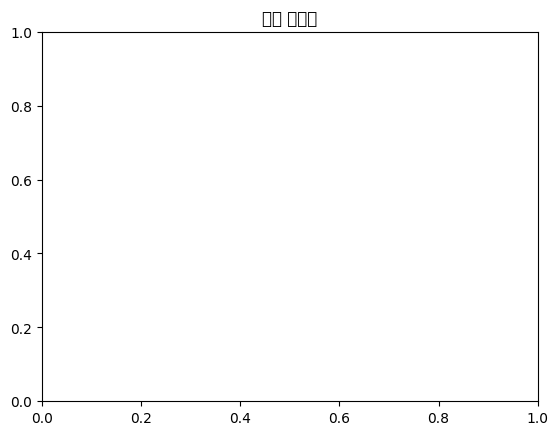

In [82]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier


plt.title("다중 클래스")


X, y = make_classification(n_samples=100, 
                           n_features=2,
                           n_informative=2,
                           n_redundant=0, 
                           n_clusters_per_class=1, 
                           random_state=42,
                           n_classes=3
                          )

grid_dtree.fit(X_train, y_train)


print(len(X))
print(y)
print(X)


In [83]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.datasets import GridSearchCV

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.2,random_state=121)
dtree = DecisionTreeClassifier()

parameters =  {'max_depth' : [1,2,3], 'min_samples_split' : [2,3]}
import pandas as pd

grid_dtree = GridSearchCV(dtree, param_grid = parameters, cv=3, refit=True)

# 붓꽃 Train 데이터로 param_grid의 하이퍼 파라미터들을 순차적으로 학습/평가
grid_dtree.fit(X_train, y_train)
# GridSearchCV 결과 추출하여 DataFrame으로 변환
scores_df = pd.DataFrame(grid_dtree.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score',\
    'split0_test_score', 'split1_test_score', 'split2_test_score']]

ImportError: cannot import name 'GridSearchCV' from 'sklearn.datasets' (C:\Users\tjddlf132\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\datasets\__init__.py)

In [87]:
from sklearn.datasets import load_diabetes

diabet = load_diabetes()
diabet.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [88]:
diabet.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [94]:
import pandas as pd
features = diabet.data
label = diabet.target

diabets_df = pd.DataFrame(features, columns=diabet.feature_names)
print(diabets_df)

          age       sex       bmi        bp        s1        s2        s3  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017293 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081413  0.083740  0.027809  0.173816   

           s4        s5        s6  
0   -0.002592  0.019907 -0.017646  
1  

In [99]:
import pandas as pd
diabet_df = pd.read_csv("./Datasets/diabets.csv")
diabet_df.head(3)

FileNotFoundError: [Errno 2] No such file or directory: './Datasets/diabets.csv'